## Обучение без учителя

Ранее мы рассматривали только задачи, где у части данных (тренировочной) была размечена целевая функция (таргет), а для другой части данных (тестовой) таргета нет, и мы хотели его восстановить. Такие задачи (классификация, регрессия, ранжирование), как вы помните, называются **обучением с учителем** (supervised learning).

Давайте посмотрим теперь на задачи, в которых таргета не дано - но все же что-то сопоставить каждому элементу надо. Такие задачи называются обучением без учителя (**unsupervised learning**).

Примеры таких задач:
* кластеризация
* уменьшение размерности
* визуализация

In [1]:
# стандартные импорты
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Кластеризация

Сгенерируем три кучки точек и попытаемся придумать, как их можно отделить

In [261]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1500, centers=3, random_state=170)
X

array([[ -5.19811282e+00,   6.41869316e-01],
       [ -5.75229538e+00,   4.18627111e-01],
       [ -1.08448984e+01,  -7.55352273e+00],
       ..., 
       [  1.36105255e+00,  -9.07491863e-01],
       [ -3.54141108e-01,   7.12241630e-01],
       [  1.88577252e+00,   1.41185693e-03]])

(-15.0, 10.0, -10.0, 4.0)

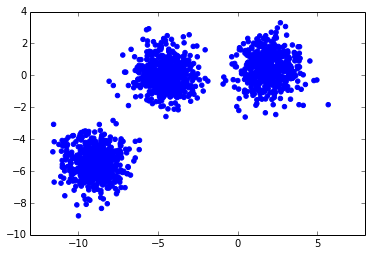

In [262]:
plt.scatter(X[:, 0], X[:, 1], edgecolors='face')
plt.axis('equal') # чтобы рисунок был не растянут

Интересно, что если забыть, из какой кучки каждая вершина - то их все еще можно попытаться восстановить. А именно давайте просто найдем **кластеры** - такие наборы точек, что точки в них находятся рядом друг с другом, а между кластерами расстояние значительно больше.

Самый простой алгоритм кластеризации - это **K-Means**.

Задание. Посмотрите примеры применения k-means на разных датасетах <a href='https://www.naftaliharris.com/blog/visualizing-k-means-clustering/'> вот тут</a>.

Сам алгоритм заключается в следующем: нужно в начале выбрать K центров кластеров (K - константа, которую надо самому выбрать).

Дале итеративно выполняются 2 шага, пока обновления не перестанут происходить:
* Обновить кластеры, приписав каждой точке кластер самого близкого к ней центра
* Обновить центр каждого кластера как центр масс его точек


Задание. Давайте напишем этот алгоритм.

In [263]:
EPS = 10 ** -6

class KMeans:
    # это конструктор - то, что вызывается при создании KMeans(n_clusters=3)
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        
    # реализуем функцию fit_predict
    # отдельно функции fit и predict делать для задач с обучением без учителя бессмысленно
    # X - это массив точек (точка - это массив координат)
    def fit_predict(self, X):
        n, m = X.shape
        # выберем из массива X ровно K точек без повторения в качестве центров
        # можно выбирать начальное положение центров кластеров и по-другому, но мы напишем просто рандомно
        cluster_centers = X[np.random.choice(range(n), self.n_clusters, replace=False)]
        
        # изначальные кластеры точек
        clusters = np.zeros(shape=(n))
        while True:
            # считаем кластеры точек: выбираем ближайший центр кластера к точке
            for i, point in enumerate(X):
                ???
                clusters[i] = ???
            
            # обновляем центр каждого кластера как среднее всех точек этого кластера
            new_cluster_centers = np.zeros(shape=(self.n_clusters, m))
            for cluster_id in range(self.n_clusters):
                new_cluster_centers[cluster_id] = ???
            
            # обновления перестали происходить, алгоритм закончился
            # надо проверить, что два массива вообще не отлчаются
            if ???:
                # сохраним результат в модели
                self.cluster_centers = cluster_centers
                self.labels_ = clusters
                return clusters
            
            cluster_centers = new_cluster_centers

Потестируем:

In [264]:
model = KMeans(n_clusters=2)

In [265]:
model.fit_predict(np.array([[10, 10], [8, 9], [2, 1], [1, 2]]))

array([ 1.,  1.,  0.,  0.])

Должно получиться [1,  1,  0,  0] или [0,  0,  1,  1]

(-15.0, 10.0, -10.0, 4.0)

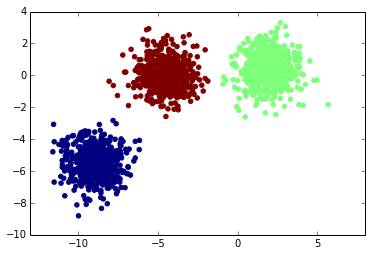

In [266]:
# Если у вас не получается написать свой KMeans, просто раскомментируйте эту строчку и подключите готовый:
# from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, edgecolors='face')
plt.axis('equal') # чтобы рисунок был не растянут

Ура, работает (или нет). Но что если кластеров там не 3, а другое число.

(-15.0, 15.0, -15.0, 5.0)

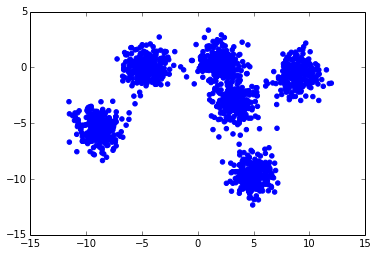

In [283]:
X, y = make_blobs(n_samples=1500, centers=6, random_state=170)
plt.scatter(X[:, 0], X[:, 1], edgecolors='face')
plt.axis('equal') # чтобы рисунок был не растянут

(-15.0, 15.0, -15.0, 5.0)

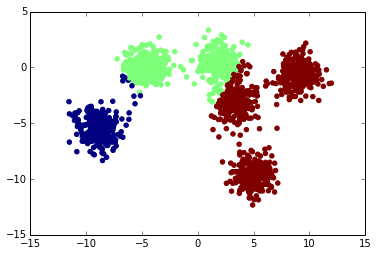

In [289]:
model = KMeans(n_clusters=3)
y_pred = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, edgecolors='face')
plt.axis('equal') # чтобы рисунок был не растянут

Тут K-Means уже не справляется (что логично, мы попросили найти 3 кластера на картинке с шестью кучками). Как же понять, какое K выбирать? Можно просто визуализировать данные и посмотреть на картинку. А можно просто перебрать K и выбрать лучший. Но как?

Нам нужна какая-то метрика того, насколько хорошо мы поделили на кластеры. Тогда мы поймем, что в этом примере разбиение на 3 класса дает плохую кластеризацию, а на 2 - хорошую.

Можно посмотреть на среднее по всем вершинами:
1. $a$ - среднее расстояние до вершин в том же кластере
2. $b$ - среднее расстояние до вершин в соседнем кластере

Как метрику можно взять, например, **силуэт**
$$s = \frac{b - a}{\max(a, b)}$$

Он расположен от -1 до +1, и чем ближе к 1, тем кластеризация лучше.

In [290]:
from sklearn import metrics
metrics.silhouette_score(X, model.labels_, metric='euclidean')

0.45745562171151927

Задание: переберите количество кластеров и убедитесь, что лучший силуэт получается у 6. Для большей точности можно запустить KMeans несколько раз и усреднить.

А теперь давайте посмотрим на менее идеальные примеры. Хватит рассматривать идеальные легко отделимые кучки.

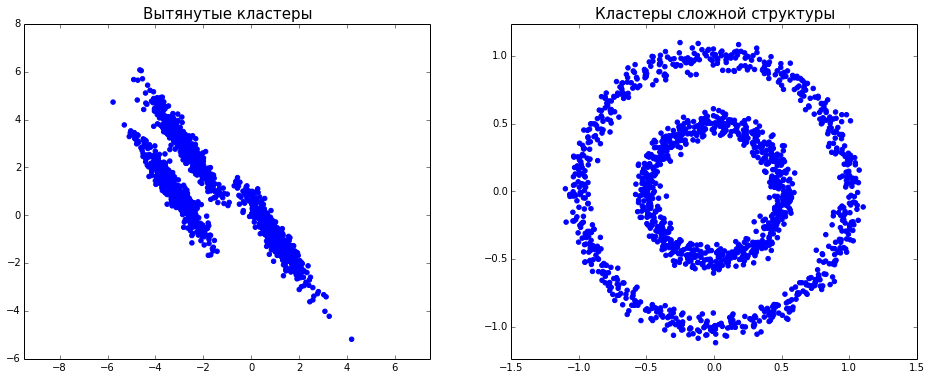

In [231]:
from sklearn.datasets import make_circles

plt.figure(figsize=(16, 6))

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]] # матрица преобразования
X_long = np.dot(X, transformation) # умножим на нее, чтобы растянуть кучки

plt.subplot(121)
plt.scatter(X_long[:, 0], X_long[:, 1], edgecolors='face')
plt.axis('equal') # чтобы рисунок был не растянут
plt.title(u"Вытянутые кластеры", fontsize=15)


X_circles, y = make_circles(n_samples=1500, factor=0.5, noise=0.05)
plt.subplot(122)
plt.scatter(X_circles[:, 0], X_circles[:, 1], edgecolors='face')
plt.axis('equal') # чтобы рисунок был не растянут
plt.title(u"Кластеры сложной структуры", fontsize=15)


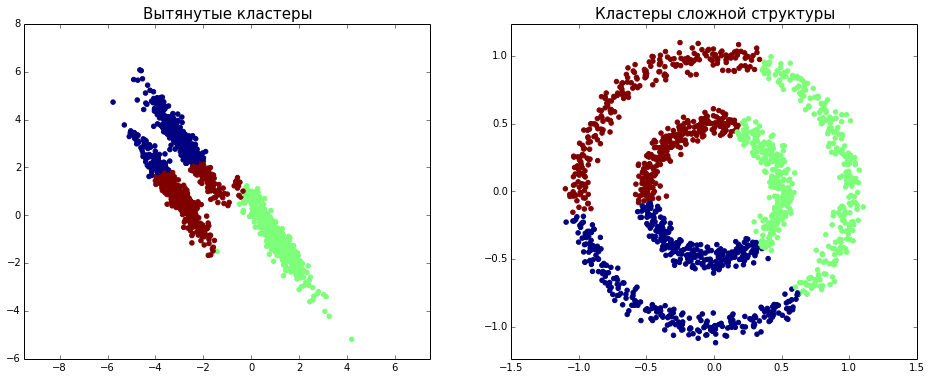

In [234]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
y_pred = KMeans(n_clusters=3).fit_predict(X_long)
plt.scatter(X_long[:, 0], X_long[:, 1], c=y_pred, edgecolors='face')
plt.axis('equal') # чтобы рисунок был не растянут
plt.title(u"Вытянутые кластеры", fontsize=15)


plt.subplot(122)
y_pred = KMeans(n_clusters=3).fit_predict(X_circles)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_pred, edgecolors='face')
plt.axis('equal') # чтобы рисунок был не растянут
plt.title(u"Кластеры сложной структуры", fontsize=15)


Видно, что алгоритм K-Means здесь не справляется вообще, он довольно наивный - принадлежность точки к кластеру определяется только тем, что центр этого кластера к ней ближайший. По сути кластеры образуют диаграмму Вороного, если вы знаете что это такое. Поэтому есть и другие алгоритмы, которые более гибкие и дают возможность быть кластерам любой формы. Например, алгоритм **DBSCAN**, который основывается на потности точек.

Задание. Посмотрите примеры визуализации **DBSCAN** на разных датасетах  <a href='https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/'> вот тут </a>.

K-Means принимает как гиперпараметр число кластеров $K$, а DBSCAN строит столько кластеров, сколько получится, причем многие вершины могут не войти ни в один кластер, они называются **выбросами**.

DBSCAN опирается на два гиперпараметра:
* eps - означает расстояние, на котором две вершины считаются соседями
* min_samples - означает сколько нужно соседей из кластера, чтобы считать вершину коренной вершиной кластера

Сам алгоритм состоит из таких шагов:
* Выбрать соседей для каждой вершины на расстоянии до eps
* Найти компоненты связности коренных вершин - добавляем вершину в компоненту коренных, если у нее хотя бы min_samples соседей лежат в этой компоненте
* Добавить оставшиеся вершины в самый популярный кластер соседей, если есть соседи
* Оставшиеся вершины - это выбросы


Задание. Подберите параметры для этих двух датасетов так, чтобы алгоритм, судя по картинке, кластеризовал близко к правильному.

In [8]:
from sklearn.cluster import DBSCAN

plt.figure(figsize=(16, 12))

plt.subplot(121)
y_pred = DBSCAN(eps=????, min_samples=????).fit_predict(X_long)
plt.scatter(X_long[:, 0], X_long[:, 1], c=y_pred, edgecolors='none')
plt.axis('equal') # чтобы рисунок был не растянут
plt.title(u"Вытянутые кластеры", fontsize=15)


plt.subplot(122)
y_pred = DBSCAN(eps=????, min_samples=????).fit_predict(X_circles)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_pred, edgecolors='none')
plt.axis('equal') # чтобы рисунок был не растянут
plt.title(u"Кластеры сложной структуры", fontsize=15)


SyntaxError: invalid syntax (<ipython-input-8-210330971b9f>, line 6)

### Доп. Задание: Уменьшение палитры изображения
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре; для этого нужно выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения; после выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.
Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN

Можно использовать и другие:
* MeanShift
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр)

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Приведите примеры работы лучшего алгоритма на выбранных вами любых картинках :)



Вот вам вспомогательная функция для считывания и вывода изображений:

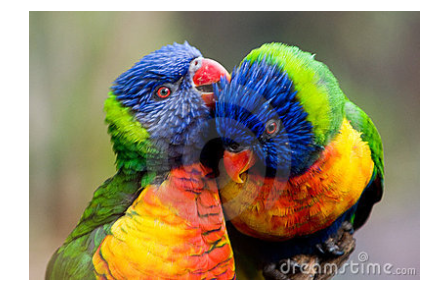

In [9]:
import cv2

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()
    

img = cv2.imread('birds.jpg')
draw_picture(img)

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

In [10]:
img.shape

(275, 400, 3)

## Уменьшение размерности и визуализация

Обе эти задачи состоят в **сжатии выборки**: нужно перевести точки из N-мерного пространства в M-мерное пространство, где M < N, причем так, чтобы близкие точки остались близкими. То есть хочется значительно уменьшить число признаков, не сильно потеряв (или даже улучшив) их качество.

Для примеров мы будем чаще всего переводить в 2-мерное пространство - это заодно и хороший способ **визуализировать** датасет.

Давайте, например, рассмотрим известный датасет с цифрами.

In [334]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

Каждое изображение представляет из себя квадратик 8x8, в каждой клетке которого написано число от 0 до 15 - насколько клетка черная. Вот, например, ноль:

In [335]:
X[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [336]:
y[0]

0

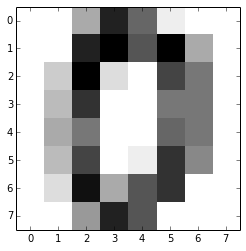

In [337]:
plt.imshow(X[0, :].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

Можем посмотреть на разные цифры, например на пятерки:


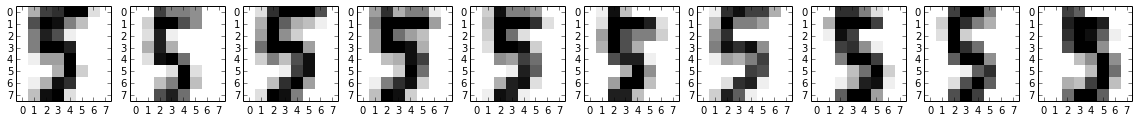

In [338]:
DIGIT = 5
NUMBER_DIGITS = 10

plt.figure(figsize=(20, 12))
digits = X[(y == DIGIT)][:NUMBER_DIGITS]
for i in range(len(digits)):
    plt.subplot(1, len(digits), i)
    plt.imshow(digits[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

Рассмотрим каждое изображение как на вектор в 64-мерном пространстве (64 признака). 

Тогда интересно уменьшить размерность этих векторов до 2 с помощью, например, алгоритма PCA.

### PCA  (метод главных компонент)

Задание. Посмотрите на <a href='http://setosa.io/ev/principal-component-analysis/'> визуализацию </a> выделения первой и второй главных компонент методом PCA.

<a href='https://ru.wikipedia.org/wiki/Метод_главных_компонент'> Метод PCA </a> заключается в том, чтобы найти в N-мерном пространстве такое K-мерное пространство, что проекция всех точек на него будет как можно более рассеянной (то есть иметь наибольшую дисперсию).

Оказывается, подходит пространство, сумма квадратов расстояния от которого до всех точек минимальна.

Первая компонента (ось) выбирается так, чтобы была дисперсия проекция вдоль нее была максимальна:

![dispersion.jpg](dispersion.jpg)

После этого все точки проецируются вдоль первой компоненты и там таким же способом выбирается вторая компонента и так далее.

Получившиеся К компонент будут образовывать K-мерное пространство, проекция точек на которое будет иметь наибольшую дисперсию.

Применим алгоритм PCA:

In [339]:
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize

pca = PCA(n_components=2)
X_pca_2 = pca.fit(X).transform(X)
X_pca_2

array([[ -1.25946652,  21.2748833 ],
       [  7.95761124, -20.76870004],
       [  6.99192313,  -9.95598541],
       ..., 
       [ 10.80128357,  -6.96025289],
       [ -4.87209988,  12.42395326],
       [ -0.34438969,   6.36554952]])

А если мы переведем в пространство большей степени, то смотрите, у нас все первые координаты всегда совпадают:

In [340]:
pca = PCA(n_components=4)

X_pca_4 = pca.fit(X).transform(X)
X_pca_4

array([[ -1.25946638,  21.27488341,  -9.46305471,  13.01418506],
       [  7.95761125, -20.76869888,   4.4395061 , -14.89366033],
       [  6.99192293,  -9.95598633,   2.95855812, -12.28830324],
       ..., 
       [ 10.80128371,  -6.96025214,   5.59955449,  -7.227732  ],
       [ -4.87209978,  12.42395338, -10.17086677,  -6.66886277],
       [ -0.34438961,   6.36554917,  10.77370847,  -7.7262141 ]])

Это и логично: k-я координата - это просто длины проекции на k-ю компоненту.

Давайте визуализируем две первые компоненты (одинаковыми цветами показаны одинаковые цифры):

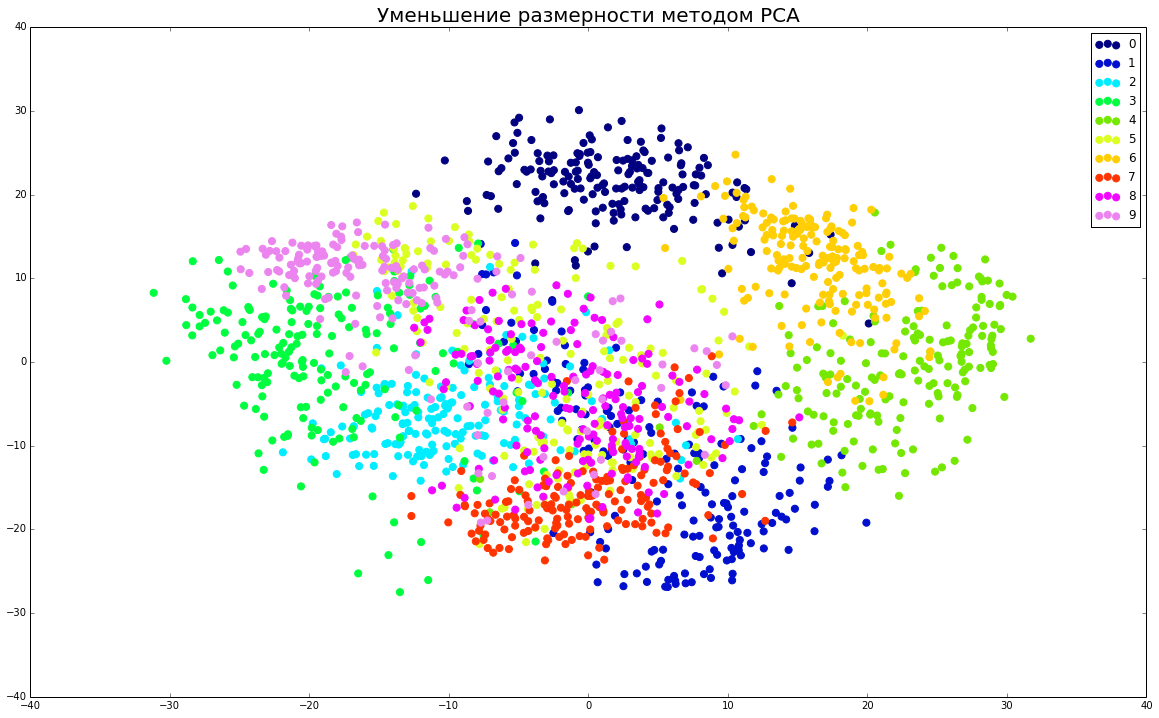

In [344]:
plt.figure(figsize=(20, 12))
for d in range(10): # перебираем цифру
    norm = Normalize(vmin=0, vmax=10) # для красивых цвето
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_pca_2[:, 0][y == d],
                X_pca_2[:, 1][y == d],
                c=[color] * len(X_pca_2[:, 0][y == d]), label=d, edgecolor='face', s=50)
plt.title(u"Уменьшение размерности методом PCA", fontsize=20)
plt.legend()

Задание. А попробуйте визуализировать третью и четвертую компоненты. Какие пары цветов стало проще отделить? Какие цвета стало сложнее отделить?

В каком-то смысле PCA - это лучший линейный способ уменьшить размерность пространства.


Мы видим, что классы одинаковых цифр не до конца отделились друг от друга, и в 2-мерном пространстве эту проблему можно решить только если использовать какой-нибудь нелинейный алгоритм. Такие существуют, давайте посмотрим, например, на tSNE.

### t-SNE
Задание. Посмотрите на <a href='https://distill.pub/2016/misread-tsne/'> красивую визуализацию </a> метода уменьшения размерности t-SNE.

Это гораздо более сложный нелинейный <a href='https://habr.com/post/267041/'> алгоритм</a>. Он очень крут для визуализации данных, и работает только с переводом в 2D и 3D. 

Но у него есть и недостатки: его координаты не имеют какого-то конертного геометрического смысла, как в PCA, и результат алгоритма не является детерминированным.

** Достоинства t-SNE **
* отлично визуализирует (2D, 3D) данные
* используется для предобрабтки данных, анализа структуры данных

** Недостатки t-SNE **
* недетерминированность, результат меняется (в отличие от PCA)
* координаты ничего не значат сами по себе (в отличие от PCA)
* нельзя легко добавить новые данные (в отличие от PCA)
* долго работает (в отличие от PCA)
* уменьшает только до 2 и 3 размерности (в отличие от PCA)


Давайте запустим на 400 итерациях (у меня работает секунд 20, если у вас долго не работает, то уменьшите число итераций):

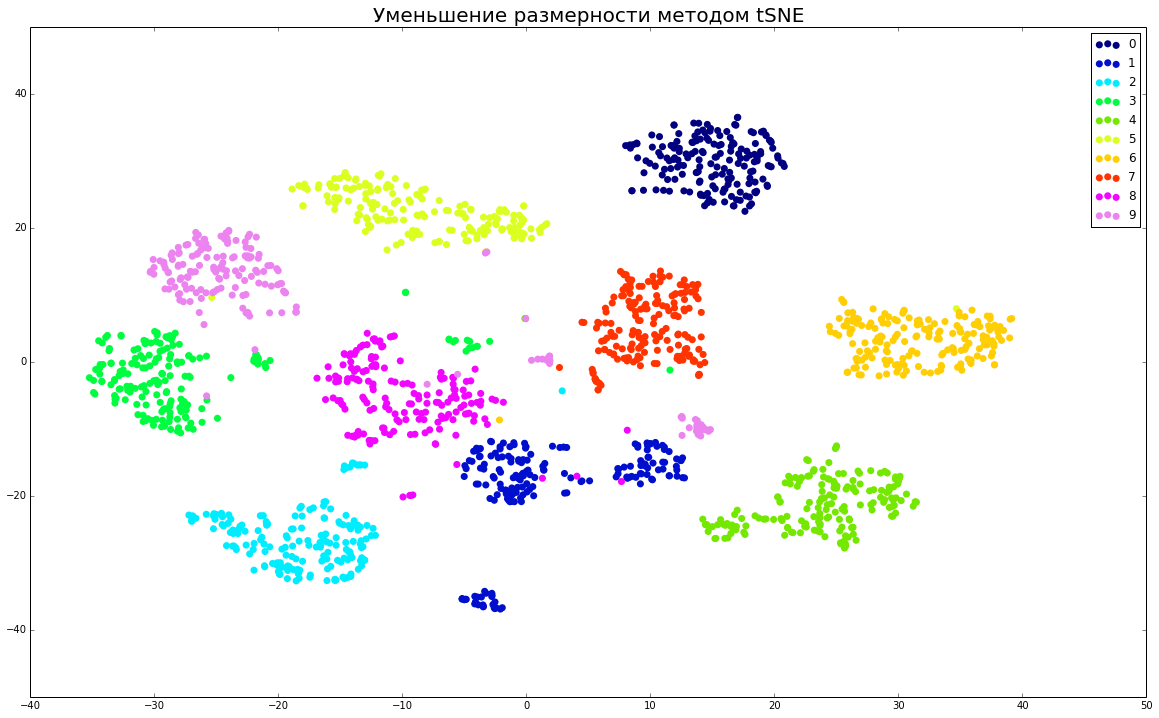

In [345]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=400)

X_tsne_2 = tsne.fit_transform(X)
plt.figure(figsize=(20, 12))
for d in range(10):
    norm = Normalize(vmin=0, vmax=10)
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_tsne_2[:, 0][y == d],
                X_tsne_2[:, 1][y == d],
                c=[color] * len(X_tsne_2[:, 0][y == d]), label=d, edgecolor='none', s=50)
plt.title(u"Уменьшение размерности методом tSNE", fontsize=20)
plt.legend()

Заметьте, что мы никак не использовали метки классов!

Несмотря на то, что мы выкинули очень много данных, кажется, что во вложении tSNE решить задачу классификации стало только проще.

А вот PCA при вложении теряет много информации, и качество должно ухудшиться (зато работают быстрее).

Давайте проверим: запустим классификацию на обычном датасете и на сжатых с помощью PCA и tSNE.

Здесь у нас будет классификация не бинарная, ведь классов аж 10, а мы такие еще не рассматривали. Но на самом деле небинарная классификация - это просто 10 раз применить бинарную классификацию в формате "один против всех". То есть мы решаем отдельно задачу для каждого класса против всех остальных, после чего получаем вероятности принадлежности рисунка каждому классу и выбираем лучшую вероятность.

In [346]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

print('X',  cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean())
print('X_pca_2D',  cross_val_score(LogisticRegression(), X_pca_2, y, scoring='accuracy').mean())
print('X_tsne_2D',  cross_val_score(LogisticRegression(), X_tsne_2, y, scoring='accuracy').mean())

('X', 0.91822044596985819)
('X_pca_2D', 0.55350637847374895)
('X_tsne_2D', 0.89479205328985401)


Мы видим, что сжатый с помощью tSNE датасете все-таки проигрывает в качестве классификации обычному, но несильно. На самом деле, если взять какой-нибудь нелинейный классификатор, то можно даже улучшить качество.

А вот PCA сильно проигрывает tSNE. Однако это потому, что мы снизили размерность аж до двух. Давайте возьмем побольше размерность признаков.

Задание. Переберите размерность сжатия датасета с помощью PCA и посчитайте для каждой из них качество классификации. Сколько признаков достаточно оставить, чтобы качество отличалось несильно?

Интересно еще посмотреть на ошибки нашей классификации:

In [376]:
model = LogisticRegression()
X_tsne_2_train, X_tsne_2_test, y_tsne_2_train, y_tsne_2_test = train_test_split(X_tsne_2, y, random_state=42)
model.fit(X_tsne_2_train, y_tsne_2_train)
y_pred = model.predict(X_tsne_2_test)
errors = (y_pred != y_tsne_2_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

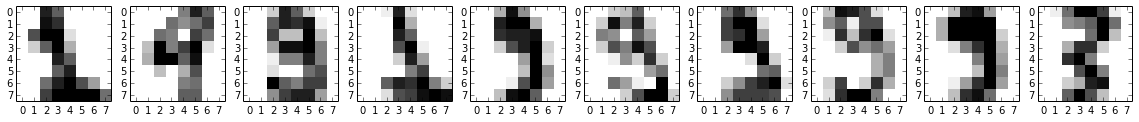

In [384]:
NUMBER_DIGITS = 10

plt.figure(figsize=(20, 12))
digits = X_test[errors][:NUMBER_DIGITS]
for i, digit in enumerate(digits):
    plt.subplot(1, len(digits), i + 1)
    plt.imshow(digit.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

In [385]:
# Предсказали:
y_pred[errors][:len(digits)]

array([2, 1, 3, 2, 3, 3, 3, 5, 3, 8])

In [386]:
# А на самом деле:
y_test[errors][:len(digits)]

array([1, 9, 9, 1, 9, 9, 9, 9, 9, 3])

## Доп. Задание: Уменьшение размерности помогает классифицировать лица

Используя методы уменьшения размерности признаков, решите с максимальным accuracy задачу классификации лиц знаменитостей.

Попробуйте добиться того же результата без методов уменьшения размерности. Получилось ли?

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ.

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [325]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0) # эту строчку менять нельзя, ресайзить нельзя

In [326]:
X = lfw_people.data
y = lfw_people.target

In [327]:
X.shape

(2370, 11750)

In [328]:
y.shape

(2370,)

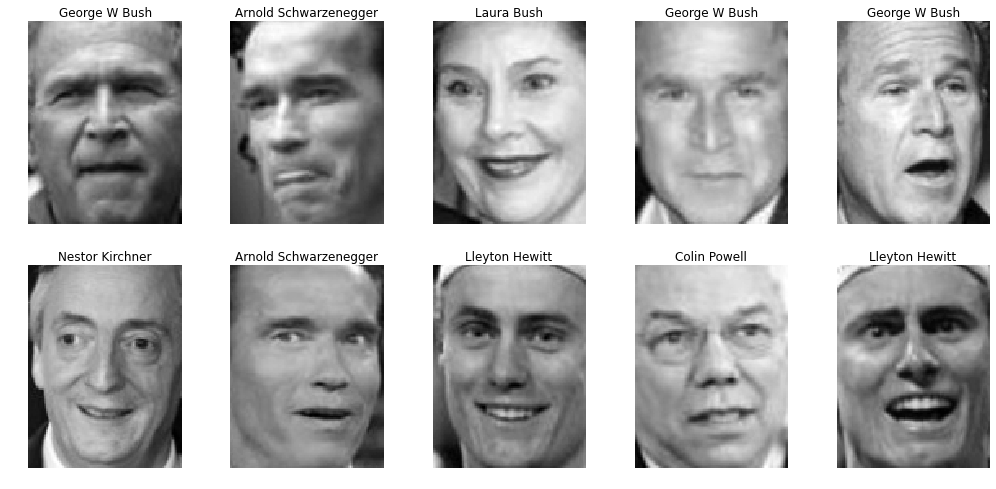

In [329]:
def plot_image(image_id):
    plt.title(lfw_people['target_names'][y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')


plot_grid(range(10), nrows=2, ncols=5)